# Who are Airbnb's Most Desired Hosts
Researcher: Yuming Ma  
Email: ma226@wisc.edu

### Data Preparation


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt         
import seaborn as sns
from pandas_datareader import data
import geopandas                           
from shapely.geometry import Point          

In [8]:
#ALL_DATA.csv is the dataset that I downloaded from "Inside Airbnb", it contains every variables I need to finish this analysis 
all_data = pd.read_csv("ALL_DATA.csv")
#print out every variables' name to allow me select the useful ones
col= all_data.columns
print(col)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
#any property information I need is in property_data 
property_data = all_data[['id', 'street','neighbourhood','neighbourhood_cleansed',
        'zipcode','latitude', 'longitude',
        'property_type', 'room_type', 'accommodates','beds',  
       'price','availability_30','availability_365','number_of_reviews','reviews_per_month',
       'first_review', 'review_scores_rating', 'is_business_travel_ready','minimum_nights']]
#any host information I need is in host_data 
host_data = all_data[['host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate','host_is_superhost', 
       'host_total_listings_count', 'host_verifications', 'calculated_host_listings_count']]
#Clease data by translating district name in English
property_data['neighbourhood_cleansed'] = property_data['neighbourhood_cleansed'].replace({'昌平区': 'Changping', 
                                                                                           '大兴区 / Daxing': 'Daxing', 
                                                                                           '房山区': 'Fangshan', 
                                                                                           '怀柔区 / Huairou': 'Huairou',
                                                                                           '门头沟区 / Mentougou': 'Mentougou',
                                                                                           '密云县 / Miyun': 'Miyun',
                                                                                           '平谷区 / Pinggu': 'Pinggu',
                                                                                           '顺义区 / Shunyi': 'Shunyi',
                                                                                           '通州区 / Tongzhou': 'Tongzhou',
                                                                                           '延庆县 / Yanqing': 'Yanqing',
                                                                                           '朝阳区 / Chaoyang': 'Beijing',
                                                                                           '东城区': 'Beijing',
                                                                                           '西城区': 'Beijing',
                                                                                           '丰台区 / Fengta': 'Beijing',
                                                                                           '海淀区': 'Beijing',
                                                                                           '石景山区': 'Beijing'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Data Visualization

#### Distribution of Host Response Time

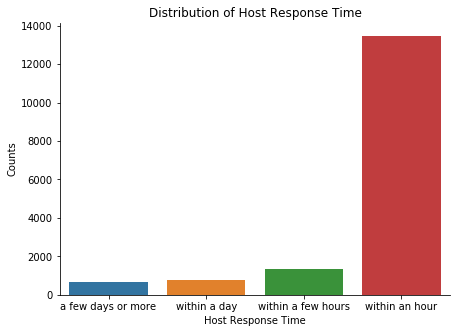

In [10]:
message_group = host_data.groupby("host_response_time").count()

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=message_group.index, y = message_group.host_id,data=message_group, ax = ax)
ax.set_xlabel('Host Response Time')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Host Response Time')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Distribution of Host Contact Channels

In [11]:
#take a look at host verifications options
host_data['host_verifications'].unique()

array(["['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual', 'work_email']",
       "['phone', 'facebook', 'reviews']",
       "['email', 'phone', 'reviews', 'zhima_selfie']",
       "['email', 'phone', 'reviews', 'kba']",
       "['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
       "['email', 'phone', 'reviews', 'jumio', 'government_id']",
       "['email', 'phone', 'facebook', 'reviews', 'weibo', 'zhima_selfie', 'work_email']",
       "['email', 'phone', 'reviews', 'jumio', 'government_id', 'sesame', 'sesame_offline']",
       "['email', 'phone', 'facebook', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']",
       "['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'government_id']",
       "['email', 'phone', 'reviews', 'jumio', 'government_id', 'sesame', 'sesame_offline', 'work_email']",
      

In [12]:
#manually select the most popular verifications options
verifications = ['email', 'phone', 'facebook', 'jumio', 'weibo','zhima_selfie']
#count the number of times each verification options are selected
email = len(host_data[host_data['host_verifications'].str.contains('email')])
phone = len(host_data[host_data['host_verifications'].str.contains('phone')])
facebook = len(host_data[host_data['host_verifications'].str.contains('facebook')])
jumio = len(host_data[host_data['host_verifications'].str.contains('jumio')])
weibo = len(host_data[host_data['host_verifications'].str.contains('weibo')])
zhima = len(host_data[host_data['host_verifications'].str.contains('zhima_selfie')])
#make dataframe
verifications_list = {'verifications':['email', 'phone', 'facebook', 'jumio', 'weibo','zhima'], 
                      'pop':[email,phone,facebook,jumio,weibo,zhima,]}
verifications_frame = pd.DataFrame(verifications_list)
verifications_frame.verifications = verifications_frame.verifications.astype(str)
print(verifications_frame.dtypes)
verifications_frame

verifications    object
pop               int64
dtype: object


,verifications,pop
0,email,16729
1,phone,23116
2,facebook,334
3,jumio,10417
4,weibo,1875
5,zhima,13370


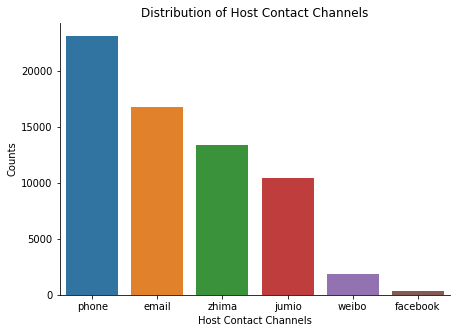

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
verifications_frame = verifications_frame.sort_values(by='pop',ascending=False)
sns.barplot(x=verifications_frame.verifications, y = verifications_frame['pop'], data=verifications_frame, ax = ax)
ax.set_xlabel('Host Contact Channels')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Host Contact Channels')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Distribution of total listings/host

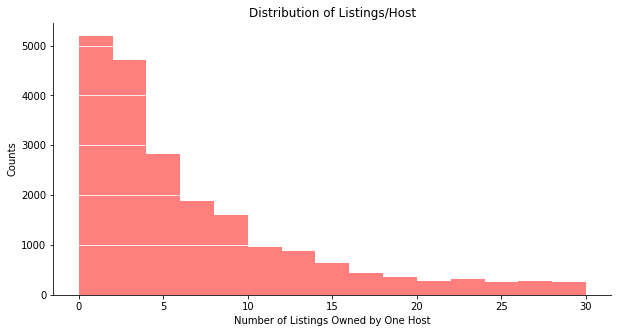

In [14]:
listings = host_data[(host_data['host_total_listings_count'] <= 30)]

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(listings['host_total_listings_count'].dropna(), bins=15, color='red', alpha=0.5)
ax.grid(axis='y', color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of Listings Owned by One Host')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Listings/Host')

plt.show()

In [15]:
#the number of hosts with more than 2 listings
two_count = len(host_data[host_data['host_total_listings_count']>=2])
#the number of hosts with more than 5 listings
five_count = len(host_data[host_data['host_total_listings_count']>=5])
#the total number of hosts
total_host = len(host_data['host_total_listings_count'])
print("The percentage of host hold more than one properties", two_count/total_host)
print("The percentage of host hold more than five properties", five_count/total_host)

The percentage of host hold more than one properties 0.7757429163787146
The percentage of host hold more than five properties 0.5086817553559088


#### Distribution of Listing Availability

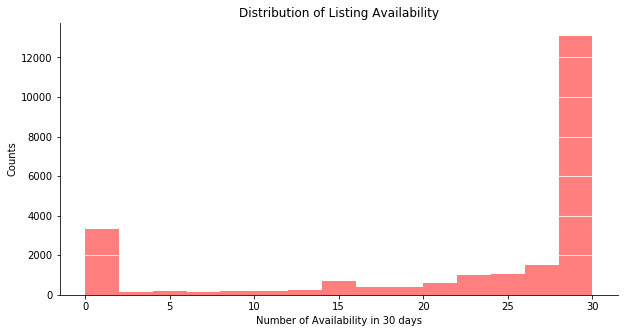

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(property_data['availability_30'].dropna(), bins=15, color='red', alpha=0.5)
ax.grid(axis='y', color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of Availability in 30 days')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Listing Availability')

plt.show()


In [17]:
a_count = len(property_data[property_data['availability_30']==30])
year_count = len(property_data[property_data['availability_365']==365])
total_count = len(property_data['availability_30'])
print("The percentage of available full month is", a_count/total_count)
print("The percentage of available full year is", year_count/total_count)


The percentage of available full month is 0.3504664823773324
The percentage of available full year is 0.2312543192812716


#### Distribution of Property Types

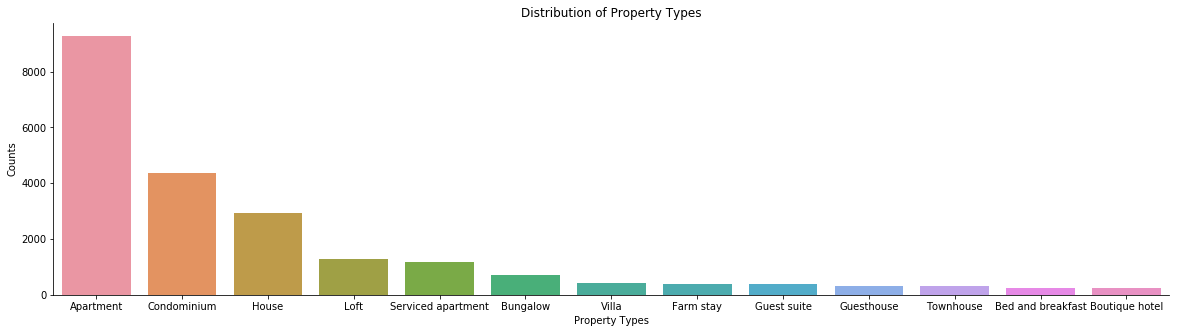

In [18]:
# property_type is a catagorical varible, use groupby to put data into right groups
property_group = property_data.groupby("property_type").count()
property_group = property_group[(property_group['id'] >= 200)]
property_group = property_group.reset_index()
#sort groups in decending order to make them more clear on the graph
property_group = property_group.sort_values(by='id',ascending=False)
property_group

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x=property_group.property_type, y = property_group.id,data=property_group, ax = ax)
ax.set_xlabel('Property Types')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Property Types')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Distribution of Room Types

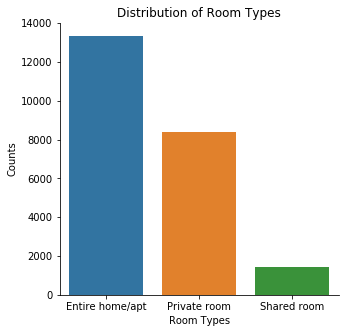

In [19]:
# room_group is a catagorical varible, use groupby to put data into right groups
room_group = property_data.groupby("room_type").count()
room_group

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=room_group.index, y = room_group.id,data=room_group, ax = ax)
ax.set_xlabel('Room Types')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Room Types')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


#### Distribution of Accommodates

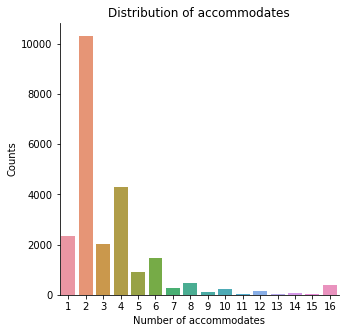

In [20]:
acc_group = property_data.groupby("accommodates").count()

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=acc_group.index, y = acc_group.id,data=acc_group, ax = ax)
ax.set_xlabel('Number of accommodates')
ax.set_ylabel('Counts')
ax.set_title('Distribution of accommodates')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


#### Distribution of listings on different areas

In [21]:
#filter the map file and save only Beijing's data
location = geopandas.read_file("gadm36_CHN_shp/gadm36_CHN_3.shp")
location = location.rename(columns={'NAME_1':'Province'})
new_location = location[location['Province'] == 'Beijing']

#merge map file and property file
new_location = new_location.rename(columns={'NAME_3':'neighbourhood_cleansed'})

merge = pd.merge(left=new_location, right=property_data, on=['neighbourhood_cleansed'], how='inner')

In [22]:
#generate point from longitude and longitude
from shapely.geometry import Point
property_data['coord'] = list(zip(property_data.longitude, property_data.latitude))
property_data['coord'] = property_data['coord'].apply(Point)
gdf = geopandas.GeoDataFrame(property_data, geometry='coord') 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


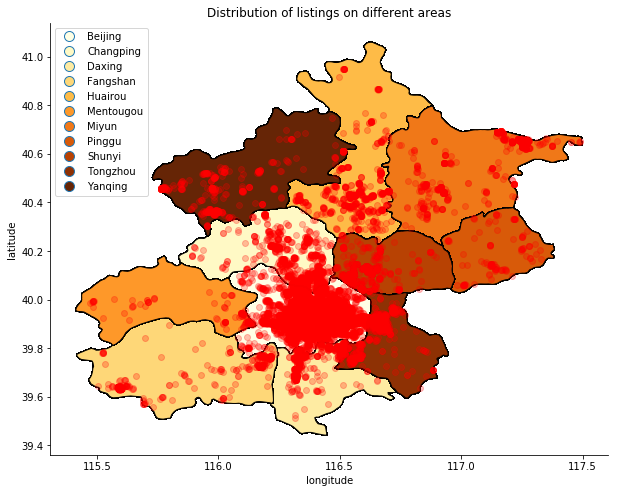

In [23]:
fig, gax = plt.subplots(figsize=(10,10))

#set up the map
merge.plot(ax=gax, edgecolor='black', column='neighbourhood_cleansed',  legend=True, cmap='YlOrBr')
#put on points
gdf.plot(ax=gax, color='red', alpha = 0.25) 
#graph formatting
gax.set_xlabel('longitude') 
gax.set_ylabel('latitude')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
gax.set_title('Distribution of listings on different areas')

plt.show()


#### User Growth Over Time

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


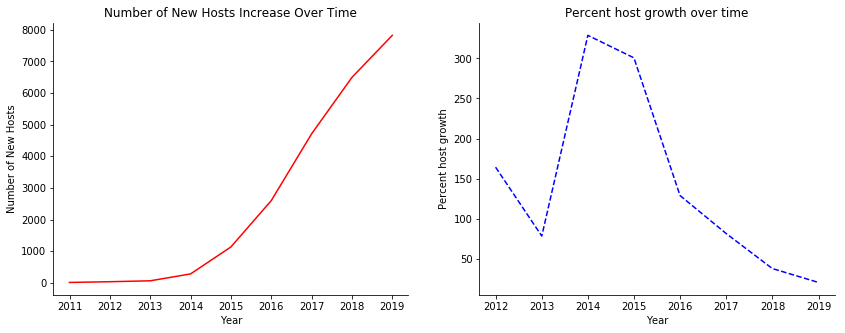

In [24]:
# count number of new hosts obtained every year
host_user = host_data[host_data.columns[host_data.columns.isin(['host_id', 'host_since'])]]
date_objs = pd.to_datetime(host_user['host_since'])
host_user['host_since'] = pd.to_datetime(host_user['host_since'], yearfirst=True)
host_user = host_user.set_index('host_since')
y_count = host_user.resample('y').count() 

#set up two plots: one shows user growth on number, the other shows the growth rate
fig, ax = plt.subplots(1,2,figsize=(14,5))
y_count['growth'] = y_count['host_id'].pct_change()*100
ax[0].plot(y_count.index, y_count.host_id,color='red')  
ax[1].plot(y_count.index, y_count['growth'],       
        color='blue', linestyle='--')  

ax[1].set_xlabel('Year') 
ax[1].set_ylabel('Percent host growth')  
ax[1].set_title('Percent host growth over time')

ax[0].set_xlabel('Year') 
ax[0].set_ylabel('Number of New Hosts')  
ax[0].set_title('Number of New Hosts Increase Over Time')

ax[0].spines['right'].set_visible(False) 
ax[0].spines['top'].set_visible(False)  
ax[1].spines['right'].set_visible(False) 
ax[1].spines['top'].set_visible(False)

plt.show()

#### Measure on Occupancy Rate

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


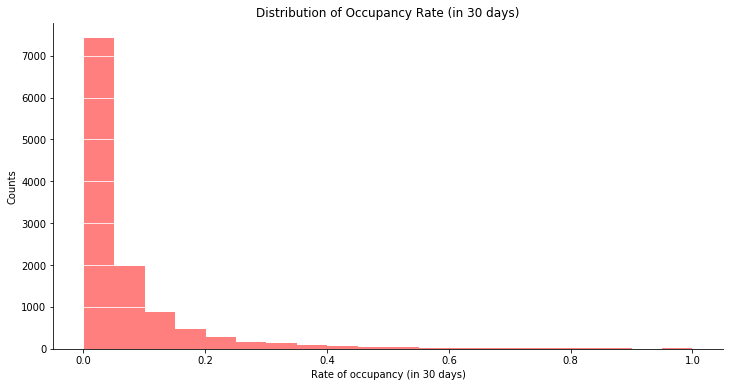

In [25]:
#calculate occupancy
property_data['occupancy'] = property_data['reviews_per_month']/property_data['availability_30']
#occupancy can have really long tail, only keep the observations with occupancy rate less than 1 
vv = property_data[(property_data['occupancy'] <= 1)]
#show distribution of occupancy on the chart
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(vv['occupancy'].dropna(), bins=20, color='red', alpha=0.5)
ax.grid(axis='y', color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Rate of occupancy (in 30 days)')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Occupancy Rate (in 30 days)')
plt.show()


In [26]:
#property_data['occupancy'] = property_data['reviews_per_month']/property_data['availability_30']
print("The average occupancy rate is", vv['occupancy'].mean())

The average occupancy rate is 0.06997231424270274


#### Hosts' Income Earned from Airbnb

In [27]:
# Formatting price variables to let it show up in float so that we can perform calculation with it
property_data['price']  = property_data['price'].str.replace('$', '')
property_data['price']  = property_data['price'].str.replace(',', '')
property_data['price'] = [float(i) for i in property_data['price']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


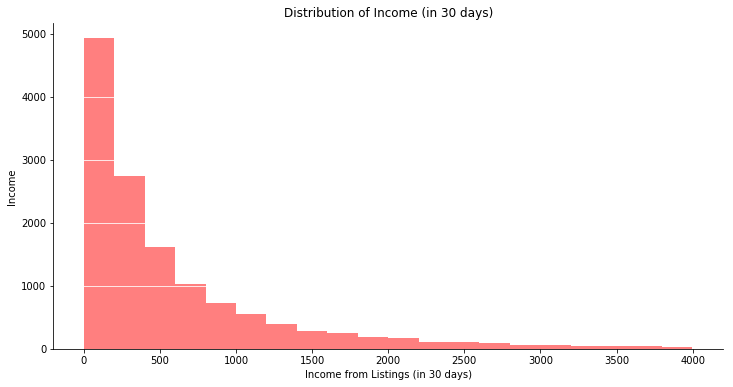

In [28]:
#calculate host's income earned on Airbnb
property_data['income'] = property_data['reviews_per_month']*property_data['price']*property_data['minimum_nights']
#The tail can be really long, only keep the observations for income less than or equal to 4000
income = property_data[(property_data['income'] <= 4000)]
#show income distribution on the chart
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(income['income'].dropna(), bins=20, color='red', alpha=0.5)
ax.grid(axis='y', color='white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Income from Listings (in 30 days)')
ax.set_ylabel('Income')
ax.set_title('Distribution of Income (in 30 days)')

plt.show()

In [29]:
print("The average monthly income earned by being Airbnb hosts", property_data['income'].mean())

The average monthly income earned by being Airbnb hosts 799.4014190962109
